<h3>This is a notebook dedicated to the first week of the final assignment of the Capstone Project - The Battle of Neighborhoods<h3>

<h2> 1.Introduction <h2>

<h3> 1.1 Case Description <h3>

In this project I will try to find an optimal location for a cafeteria in my hometown, in Thessaloniki, Greece. This report facilitates the market analysis of this type of store and targets the stakeholders to evaluate the situation.

Since there are lots of cafes in Thessaloniki, I will try to detect locations that are not already crowded with cafes, or their is a lot of potential due to their location in comparison with the customers traffic. Another factor is to check the existence of other cafes in vicinity, which would affect our total sales.

I will utilize the Clustering analysis to detect some promising spots in crowded neighborhoods based on the upper criteria. The final step will point out the best locations <b> if not the only one <b/>.

<h3> 1.2 Disscusion of the Background <h3/>

In [1]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import openpyxl
from PIL import Image
import requests

Thessaloniki is the second largest city in Greece after capital Athens, having about 1 million people live, in an area of 1,285 km2 and city density of 7,100 residents per square kilometer. The city is divided into 7 districts in total. However, the biggest municipal unit is the center of the town with 1/3 of the total population to live there.

As you can see from the picture (municipals are marked with green dot), Thessaloniki is a city with a relatively high population density. Being such a crowded city leads the owners of shops and social sharing places in the city where the population is dense. When we think of it as an investor, I would prefer those districts where there is a lower real estate cost (not in scope of this research) and the type of business they want to initiate is less intense. However, it is difficult to obtain information to the full extent as our means of research are limited to the foursquare listed locations.

When we consider all these problems, we can create a map and information chart where the real estate index is placed on Istanbul and each district is clustered according to the venue density.

In [2]:
import folium
from geopy.geocoders import Nominatim
map_infos = pd.read_json('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json')

df = pd.read_excel('C:/Users/sidpa/Desktop/Thessaloniki_info.xls')
df=df.replace(',','.')
df.dropna(subset=['Latitude'],inplace=True)

df_bor = pd.read_excel('C:/Users/sidpa/Desktop/Thessaloniki Boroughs.xls')
df_bor

address = 'Thessaloniki'
geolocator = Nominatim(user_agent="thess_explorer")
latitude = '40.629269'
longitude = '22.947412'
map_thess = folium.Map(location=[latitude, longitude], zoom_start=15)

for lat,lng,label in zip(df_bor['Latitude'],df_bor['Longitude'],df_bor['Municipal Unit']):
    folium.features.CircleMarker([lat,lng],radius = 15, color = 'red', popup = label, fill = True, fill_opacity = 0.3).add_to(map_thess)

map_thess

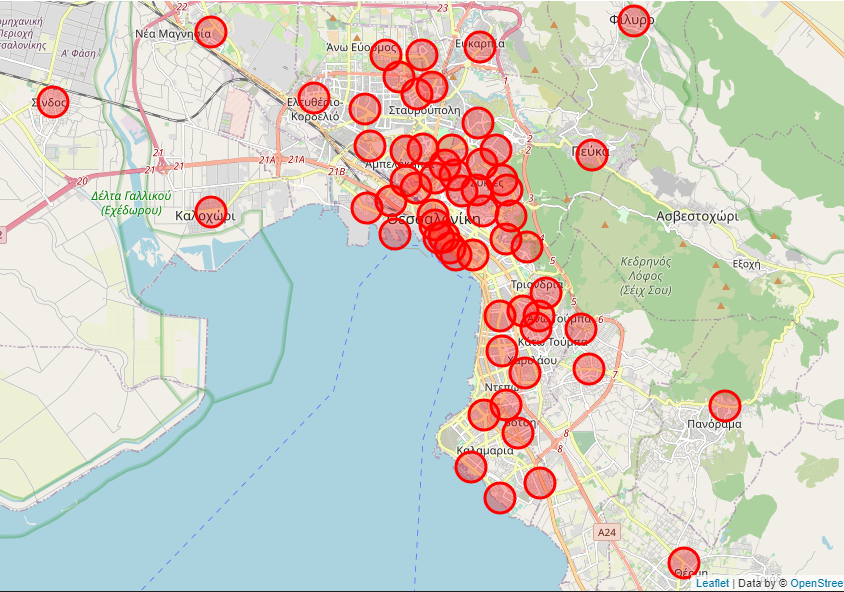

In [125]:
## the above map uploaded as image
url='https://github.com/sidpanos/Coursera_Capstone/blob/main/Thess_bor.PNG?raw=true'
im = Image.open(requests.get(url, stream=True).raw)
im

<h3> 2. Data Description <h3/>

This business case has been drop-downed to its core elements:

As presented above, the map of Thessaloniki has been splited into its boroughs, where Wikipedia and Google Maps have been used as a primary source. Each borough has 4 properties:
- the municipal unit that it belongs
- the longitude
- the latitude
- the approximately the number of inhabitants (as per population census of 2011)

One drawback is that there is not so much data available, therefore I have to look into multiple sites to formulate the data tables.

Secondly, I used Forsquare API to get the most common venues of given Borough of Thessaloniki.

Lastly, I used Google Map, ‘Search Nearby’ option to get the center coordinates of the each Borough as well as to compare to the given venues.

<h3> 3. Methodology <h3/>

I stored the dataset on GitHub repository.
The columns of the dataset consist of the borough, the longitude, the latitude and the population.

In [6]:
df_bor = pd.read_excel('C:/Users/sidpa/Desktop/Thessaloniki Boroughs.xls')
df_bor.set_index('Borough')
df_bor.head()

,Municipal Unit,Borough,Latitude,Longitude,Pop
0,Thermi,Thermi,40.550252,23.021072,53201
1,Stavroupoli,Nikopoli,40.682636,22.931380,7452
2,Stavroupoli,Stavroupoli,40.672539,22.929546,27084
3,Sindos,Sindos,40.670536,22.804609,9289
4,Sikies,Sikies,40.647503,22.960524,22544


Next step is to connect to Foursquare Api and get all venues in a radius of 500m for the given Boroughs.

In [7]:
## Foursquare API 
CLIENT_ID = '40THISTOEGJECQZTCJTHPTKCO2UGLI4TYXSWY0IIF2COOT52' # your Foursquare ID
CLIENT_SECRET = 'U4524WYKRTND5Y0ULAIVXUO5LPYDUYVGELUPKQW3LYBNUZ3E' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

## Define function to get venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
## explore venues within radius and up to LIMIT

Th_venues = getNearbyVenues(names = df_bor['Borough'], latitudes=df_bor['Latitude'], longitudes=df_bor['Longitude'])
Th_venues.head()

Thermi
Nikopoli
Stavroupoli
Sindos
Sikies
Varna
Kalithea
Eptapirgio
Pylaia
Polixni
Meteora
Pefka
Panorama
Palaiokastro
Oreokastro
Neapoli
Troada
Elpida
Anagennisi
Kokkoras
Nea Ionia
Menemeni
Kalochori
Kalamaria
Kalabournaki
Votsi
Finikas
Nea Krini
Aretsou
Ano Ilioupoli
Omonia
Filiro
Evosmos
Nea Politia
Eleftherio-Kordelio
Efkarpia
Aristotelous
Ano Poli
Charilaou
Depot
Frangon
Evaggelistria
Agios Fanourios
Aristoteleio
Paralia
Ladadika
Navarinou
Port
Saranta Eklisies
Ano Toumpa
Kato Toumpa
Vardaris
Sfageia
Sidirodromikos Stathmos
Louloudadika
Agia Triada
Analipsi
Malakopi
Kamara
Arxaia Agora
Ampelokipoi
Skeparni
Terpsithea
Ksirokrini
Agios Pavlos
Triandria


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Thermi,40.550252,23.021072,Τάκος,40.550473,23.021029,Taverna
1,Thermi,40.550252,23.021072,Brunch Box,40.548052,23.021925,Breakfast Spot
2,Thermi,40.550252,23.021072,iCareStore,40.548792,23.019753,Electronics Store
3,Thermi,40.550252,23.021072,Coffee Brothers,40.548868,23.020547,Coffee Shop
4,Thermi,40.550252,23.021072,Thermi Square (Πλατεία Θέρμης),40.547596,23.019806,Plaza


In [9]:
Th_venues['Venues'] = Th_venues.groupby('Neighbourhood')['Neighbourhood'].transform('count')
Th_venues = pd.merge(Th_venues,df_bor[['Borough','Pop']],left_on = 'Neighbourhood', right_on = 'Borough',how = 'left').drop(columns= ['Borough'])
Th_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venues,Pop
0,Thermi,40.550252,23.021072,Τάκος,40.550473,23.021029,Taverna,27,53201
1,Thermi,40.550252,23.021072,Brunch Box,40.548052,23.021925,Breakfast Spot,27,53201
2,Thermi,40.550252,23.021072,iCareStore,40.548792,23.019753,Electronics Store,27,53201
3,Thermi,40.550252,23.021072,Coffee Brothers,40.548868,23.020547,Coffee Shop,27,53201
4,Thermi,40.550252,23.021072,Thermi Square (Πλατεία Θέρμης),40.547596,23.019806,Plaza,27,53201


I am transforming my main foursquare table with onehot transformation to get the venue categories as indexes

In [10]:
## Count number of unique venue categories

Th_venues.groupby('Neighbourhood').count() 
print('There are {} unique categories.'.format(len(Th_venues['Venue Category'].unique())))
                                                             
# Use one hot encoding to separate Venue Category 
Th_onehot = pd.get_dummies(Th_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Th_onehot['Neighbourhood'] = Th_venues['Neighbourhood'] 
Th_onehot['Venues'] = Th_venues['Venues'] 
Th_onehot['Pop'] = Th_venues['Pop'] 

# move neighborhood column to the first column
fixed_columns = [Th_onehot.columns[-3]] +[Th_onehot.columns[-2]] +[Th_onehot.columns[-1]] + list(Th_onehot.columns[:-3])
Th_onehot = Th_onehot[fixed_columns]
Th_onehot.head()

There are 202 unique categories.


,Neighbourhood,Venues,Pop,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Volleyball Court,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Thermi,27,53201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Thermi,27,53201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Thermi,27,53201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Thermi,27,53201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Thermi,27,53201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
## Group by neighborhood and return the mean per category 
Th_grouped = Th_onehot.groupby('Neighbourhood').mean().reset_index()
print (Th_grouped.shape)  

## return top 10 most common venues per Neighborhood

num_top_venues = 10

for hood,cnt,pop in zip(Th_grouped['Neighbourhood'],Th_grouped['Venues'],Th_grouped['Pop']):
    print("---- "+hood+ " has "+ str(cnt) + " venues and a population of " + str(pop)+ " ----")
    temp = Th_grouped[Th_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[3:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

(66, 205)
---- Agia Triada has 43 venues and a population of 8861 ----
              venue  freq
0              Café  0.12
1       Coffee Shop  0.07
2  Greek Restaurant  0.07
3           Theater  0.05
4             Hotel  0.05
5    Sandwich Place  0.05
6       Pizza Place  0.05
7               Bar  0.05
8          Beer Bar  0.05
9               Gym  0.05


---- Agios Fanourios has 38 venues and a population of 19096 ----
                  venue  freq
0      Greek Restaurant  0.13
1       Meze Restaurant  0.08
2  Fast Food Restaurant  0.05
3                  Café  0.05
4              Bus Stop  0.05
5           Coffee Shop  0.05
6           Pizza Place  0.05
7           Supermarket  0.05
8         Bowling Alley  0.03
9       Other Nightlife  0.03


---- Agios Pavlos has 39 venues and a population of 6852 ----
              venue  freq
0              Café  0.13
1  Greek Restaurant  0.10
2            Castle  0.08
3             Plaza  0.05
4       Supermarket  0.05
5      Dessert Shop  0.05

Each borough has been analysed to the frequency where each type of store appears in that area. Primary type of shops is the cafes or cafe type shops.

In [12]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Create a new dataframe to display the top 10 venues per Neighborhood, note indicator code

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Th_venues_sorted = pd.DataFrame(columns=columns)
Th_venues_sorted['Neighbourhood'] = Th_grouped['Neighbourhood']

for ind in np.arange(Th_grouped.shape[0]):
    Th_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Th_grouped.iloc[ind, :], num_top_venues)
print(Th_venues.shape)
Th_venues_sorted.head()

(2106, 9)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agia Triada,Café,Coffee Shop,Greek Restaurant,Hotel,Bar
1,Agios Fanourios,Greek Restaurant,Meze Restaurant,Café,Coffee Shop,Bus Stop
2,Agios Pavlos,Café,Greek Restaurant,Castle,Bar,Supermarket
3,Ampelokipoi,Café,Greek Restaurant,Supermarket,Bar,Bakery
4,Anagennisi,Mobile Phone Shop,Café,Dessert Shop,Plaza,Kafenio


<h5> Besides the most frequent venues in each area, it's important to consider also the population living in the area.<h5/>


<h4> One of the biggest drawbacks is the assumption that each population will visit solely the venues of their area.<h4/>

<h4> In those areas where either there is no Foursquare listed Cafe, the value -NaN- will be replaced with 0. <h4/>

In [41]:
Th_plot = Th_onehot[['Neighbourhood','Venues','Pop']]
Th_plot.drop_duplicates(subset=['Neighbourhood'], inplace = True)
Th_plot.set_index('Neighbourhood', inplace = True)

# instead of searching for specific keywords, I am looking into cof or caf containing words to include misstypes
#Th_plot['No of Cafe'] = Th_venues[Th_venues['Venue Category']=='Caf*'].groupby(['Neighbourhood']).size() + Th_venues[Th_venues['Venue Category']=='Cof*'].groupby(['Neighbourhood']).size()
Th_plot['No of Cafe'] = Th_venues[Th_venues['Venue Category'].str.contains('Caf*')].groupby(['Neighbourhood']).size() + Th_venues[Th_venues['Venue Category'].str.contains('Cof*')].groupby(['Neighbourhood']).size()

Th_plot.fillna(0, inplace = True)
Th_plot['No Cafe per 1k'] = Th_plot['No of Cafe'] * 1000 / Th_plot['Pop']
Th_plot_sorted = Th_plot.sort_values(by=['No Cafe per 1k'], ascending=False)
Th_plot_sorted

C:\Users\sidpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sidpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sidpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from

,Venues,Pop,No of Cafe,No Cafe per 1k
Neighbourhood,,,,
Louloudadika,100,4539,21.0,4.626570
Navarinou,85,4421,19.0,4.297670
Ladadika,100,4626,19.0,4.107220
Paralia,86,4708,19.0,4.035684
Aristotelous,100,4855,19.0,3.913491
Frangon,70,4594,15.0,3.265128
Skeparni,30,3245,8.0,2.465331
Elpida,36,3783,6.0,1.586043
Kokkoras,23,3807,6.0,1.576044


Visualization is a great tool to extract precious outcomes in a concentrated form.

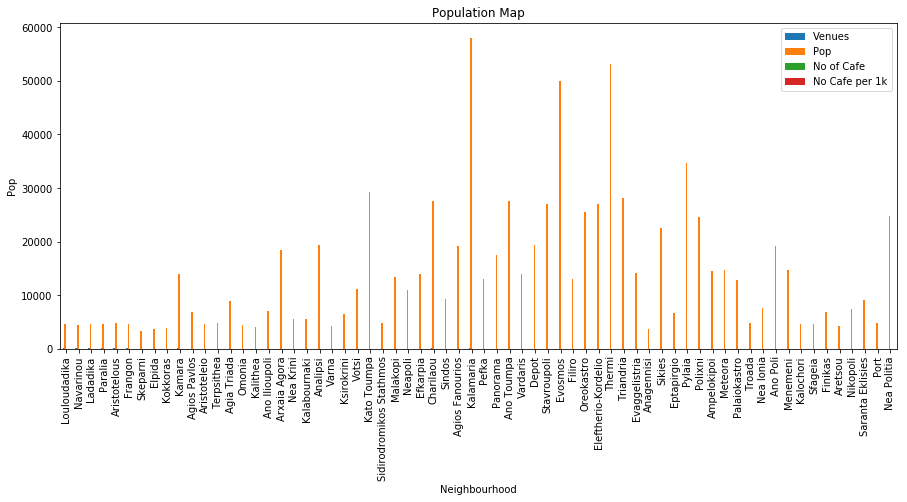

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

Th_plot_sorted.plot(kind = 'bar', figsize = (15,6))
plt.xlabel('Neighbourhood')
plt.ylabel('Pop')
plt.title('Population Map')
plt.show()

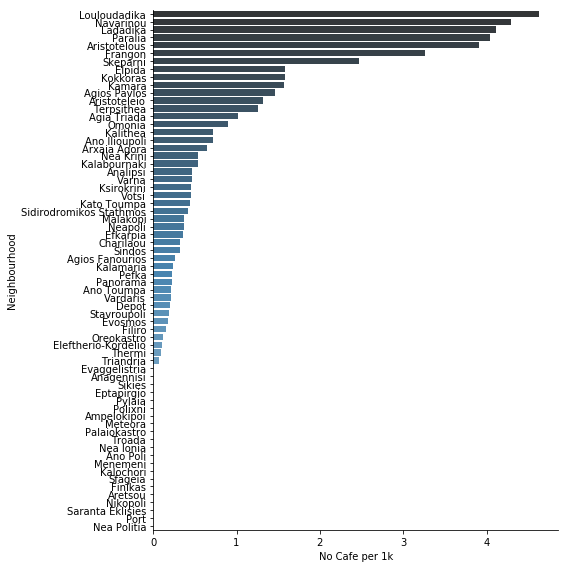

In [44]:
import seaborn as sns

srt_order = Th_plot.sort_values(by=['No Cafe per 1k'], ascending=False)
ax = sns.catplot(x="No Cafe per 1k", y="Neighbourhood", data=Th_plot_sorted.reset_index(), palette="Blues_d",kind="bar",
                height=8)

Clustering (5 Groups)

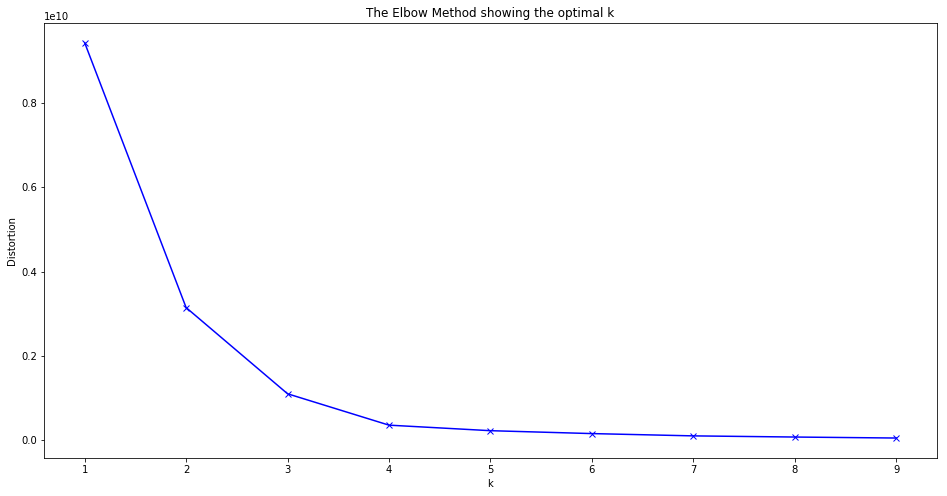

In [107]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Th_plot_clustering)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the above graph, I conclude that the optimal number of clusters are 4.

In [127]:
from sklearn.cluster import KMeans

## Run k-means clustering
Th_grouped.reset_index()

kclusters = 4

Th_plot_clustering = Th_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Th_plot_clustering)

# check cluster labels generated for each row in the dataframe

kmeans.labels_[0:]

array([0, 3, 0, 3, 0, 3, 0, 3, 1, 0, 0, 0, 3, 1, 3, 3, 1, 0, 0, 3, 2, 3,
       0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 1, 3, 0, 0,
       1, 3, 3, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 3, 0, 3])

In [139]:
## add labels to the table and merge my basic table of venues with the table of boroughs

Th_plot_sorted2 = Th_plot_sorted
Th_plot_sorted2.insert(0,'Cluster labels', kmeans.labels_)
Th_plot_sorted.reset_index(inplace=True)
Th_venues_merged = df_bor[['Borough','Latitude','Longitude']]

Th_plot_merged2 = pd.merge(Th_plot_sorted2,Th_venues_merged,left_on = 'Neighbourhood', right_on = 'Borough',how = 'left').drop(columns= ['Borough'])
Th_plot_merged2.head()


,Cluster labels2,Neighbourhood,Cluster labels,Venues,Pop,No of Cafe,No Cafe per 1k,Latitude,Longitude
0,0,Louloudadika,0,100,4539,21.0,4.626570,40.635217,22.938601
1,3,Navarinou,4,85,4421,19.0,4.297670,40.630700,22.948700
2,0,Ladadika,0,100,4626,19.0,4.107220,40.635000,22.937000
3,3,Paralia,2,86,4708,19.0,4.035684,40.630518,22.942848
4,0,Aristotelous,0,100,4855,19.0,3.913491,40.632380,22.940940


<h3> 3.Results <h3/>

Having formulated the tables, it is important to illustrate the clusters on the map.

In [145]:
Th_merged=Th_plot_merged2
Th_merged.drop(columns=['Cluster labels'],inplace=True)
Th_merged.rename(columns={"Cluster labels2": "Cluster labels"},inplace = True)

In [161]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Th_merged['Latitude'], Th_merged['Longitude'], Th_merged['Neighbourhood'], Th_merged['Cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

It is crucial to have all clusters listed in order to continue with the location research. The clusters are presented below, starting from the most promising places to open a cafe, continuing in descending order.

In [162]:
Th_Loc1=Th_merged.loc[Th_plot_merged['Cluster labels'] == 0, Th_merged.columns[[0,1,2,3,4] + list(range(5, Th_merged.shape[1]))]] 
Th_Loc1

,Cluster labels,Neighbourhood,Venues,Pop,No of Cafe,No Cafe per 1k,Latitude,Longitude
0,0,Louloudadika,100,4539,21.0,4.626570,40.635217,22.938601
2,0,Ladadika,100,4626,19.0,4.107220,40.635000,22.937000
4,0,Aristotelous,100,4855,19.0,3.913491,40.632380,22.940940
6,0,Skeparni,30,3245,8.0,2.465331,40.649991,22.925824
9,0,Kamara,97,13993,22.0,1.572215,40.632139,22.951532
10,0,Agios Pavlos,39,6852,10.0,1.459428,40.640886,22.961603
11,0,Aristoteleio,22,4550,6.0,1.318681,40.630613,22.961326
17,0,Arxaia Agora,55,18486,12.0,0.649140,40.638083,22.946455
18,0,Nea Krini,15,5552,3.0,0.540346,40.567308,22.958035
22,0,Ksirokrini,21,6536,3.0,0.458996,40.648192,22.929279


In [163]:
Th_Loc2=Th_merged.loc[Th_plot_merged['Cluster labels'] == 1, Th_merged.columns[[0,1,2,3,4] + list(range(5, Th_merged.shape[1]))]] 
Th_Loc2

,Cluster labels,Neighbourhood,Venues,Pop,No of Cafe,No Cafe per 1k,Latitude,Longitude
8,1,Kokkoras,23,3807,6.0,1.576044,40.654466,22.951838
13,1,Agia Triada,43,8861,9.0,1.015687,40.614639,22.957900
16,1,Ano Ilioupoli,18,6994,5.0,0.714898,40.676974,22.923420
29,1,Charilaou,58,27623,9.0,0.325815,40.600000,22.966667
40,1,Filiro,7,13052,2.0,0.153233,40.691547,23.003896
44,1,Triandria,15,28210,2.0,0.070897,40.620717,22.973854
49,1,Pylaia,15,34625,0.0,0.000000,40.600941,22.988687
51,1,Ampelokipoi,42,14532,0.0,0.000000,40.657817,22.925769
55,1,Nea Ionia,12,7576,0.0,0.000000,40.688825,22.858903
58,1,Kalochori,6,4672,0.0,0.000000,40.641963,22.858805


In [164]:
Th_Loc3=Th_merged.loc[Th_plot_merged['Cluster labels'] == 2, Th_merged.columns[[0,1,2,3,4] + list(range(5, Th_merged.shape[1]))]] 
Th_Loc3

,Cluster labels,Neighbourhood,Venues,Pop,No of Cafe,No Cafe per 1k,Latitude,Longitude
20,2,Analipsi,38,19459,9.0,0.462511,40.605500,22.958812
25,2,Sidirodromikos Stathmos,42,4780,2.0,0.418410,40.644588,22.920662
60,2,Finikas,19,6941,0.0,0.000000,40.571090,22.971795


In [165]:
Th_Loc4=Th_merged.loc[Th_plot_merged['Cluster labels'] == 3, Th_merged.columns[[0,1,2,3,4] + list(range(5, Th_merged.shape[1]))]] 
Th_Loc4

,Cluster labels,Neighbourhood,Venues,Pop,No of Cafe,No Cafe per 1k,Latitude,Longitude
1,3,Navarinou,85,4421,19.0,4.297670,40.630700,22.948700
3,3,Paralia,86,4708,19.0,4.035684,40.630518,22.942848
5,3,Frangon,70,4594,15.0,3.265128,40.638348,22.935515
7,3,Elpida,36,3783,6.0,1.586043,40.658080,22.941657
12,3,Terpsithea,32,4751,6.0,1.262892,40.658293,22.931714
14,3,Omonia,21,4478,4.0,0.893256,40.674313,22.934771
15,3,Kalithea,14,4155,3.0,0.722022,40.647206,22.944919
19,3,Kalabournaki,34,5553,3.0,0.540249,40.588865,22.952594
21,3,Varna,12,4344,2.0,0.460405,40.647662,22.949993
28,3,Efkarpia,16,13905,5.0,0.359583,40.684681,22.950997


<h3> 4.Discussion <h3/>

As mentioned earlier, Thessaloniki is a big city with highly populated center and less populated peripheral zones.
Using the elbow method to calculate the optimal amount of clusters and having considered the number of venues in the area (within 500m proximity to each venue), the number of cafes in the area I generated an approximate depictation of the areas where the investors of a new cafe should focus on.

I used the Kmeans algorithm as part of this clustering study. When I tested the Elbow method, I set the optimum k value to 4.
For the clustering process I considered the coordinates of each borough, the total venues in that area and the number of cafes.

I ended the study by visualizing the data and clustering information on two different maps. The first shows the total inhabitants in each borough and the second the number of cafes per 1.000 inh..

However, there are some limitations in this research. Namely, the fact that the database uses only information from the Foursquare registered venues, which excludes all shops which do not have any partnership with the platform. Secondly, the assumption that each location has potential customers account to the total population of each borough. The problem specifically lies on the population which live on the "boarders" of each borough and those who may choose a coffee shop from another neighboring area. Additionally, this research does not consider all city centers, malls, areas with parking areas in proximity, or free time/activity designated areas which will attract more potential customers. Finally the total costs of running a business, the rents, the attractiveness of each location are important factors for the location selection.

In the cell below, the graph illustrates the population of each borough to the number of cafes in the area.

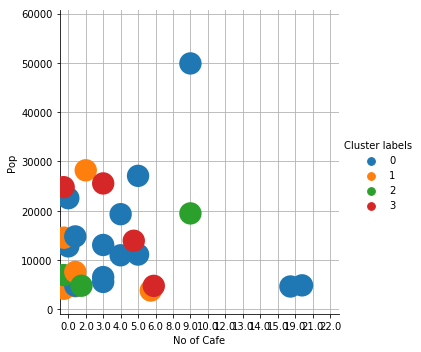

In [193]:
minsize = min(Th_merged['Pop'])
maxsize = max(Th_merged['Pop'])

sns.catplot(x="No of Cafe", y="Pop", kind="swarm", hue="Cluster labels",sizes=(0, 500), data=Th_merged)
plt.grid()

<h3> 5. Conclusion <h3/>

From the above graph, I can conclude that the majority of the clusters are performing well, balancing the population and the cafe options. I would clearly go to the top blue outlier, an area of 50.000 people who are under served. The rest of the upper left corner are looking promising as well.

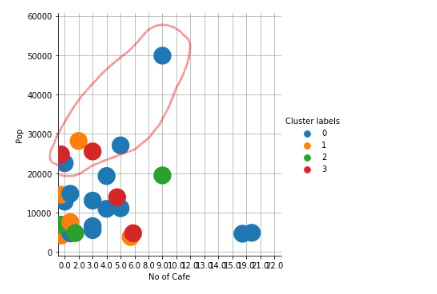

In [199]:
url='https://github.com/sidpanos/Coursera_Capstone/blob/main/clustering%20do_LI.jpg?raw=true'
im2 = Image.open(requests.get(url, stream=True).raw)
im2

On the contrary, I wouldn't select the two far right outliers, as it seems that they are less crowded, though are adequately covered with coffee shops. For the same reasons  I would exclude the boroughs in the red circle.

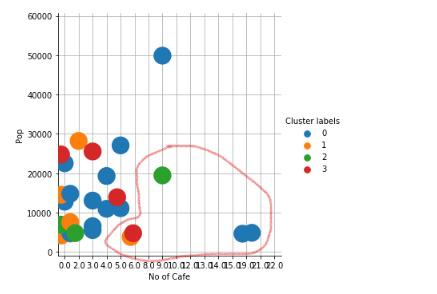

In [200]:
url='https://github.com/sidpanos/Coursera_Capstone/blob/main/clustering%20dont_LI.jpg?raw=true'
im3 = Image.open(requests.get(url, stream=True).raw)
im3